# Investment Ranking

In [1]:
#The following code computes and summarized the investment ranking by Neighborhoods in selected ZIP codes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps
import numpy as np
import seaborn as sns

from config import gkey
gmaps.configure(api_key=gkey)

### Import Data Files And Merge

In [3]:
# read file with all needed data
file = "Output/combined_data_without_charter_schools.csv"
only_public_schools = pd.read_csv(file)
only_public_schools.head()

,Address,Latitude,Longitude,Flood Description,Flood Zone,Flood Risk,SITE_ADDR_1,ACCOUNT,TAX_YEAR,SITE_ADDR_2,...,change_assessed_value_2018_2019,change_total_appraised_value_2018_2019,change_total_market_value_2018_2019,pct_change_land_value_2018_2019,pct_change_assessed_value_2018_2019,pct_change_total_appraised_value_2018_2019,pct_change_total_market_value_2018_2019,pct_change,Sale Year,2019 Sales
0,"2202 CAROLINE ST HOUSTON, Texas 77002",29.74614,-95.36987,AREA OF MINIMAL FLOOD HAZARD,X,3,2202 CAROLINE ST,21750000003,2019,HOUSTON,...,0.0,0.0,0.0,88856.0,298900.0,298900.0,298900.0,0.000000,2009,0
1,"2218 CAROLINE ST HOUSTON, Texas 77002",29.74605,-95.37014,AREA OF MINIMAL FLOOD HAZARD,X,3,2218 CAROLINE ST,21750000013,2019,HOUSTON,...,0.0,0.0,0.0,674900.0,814900.0,814900.0,814900.0,0.000000,1995,0
2,"2204 CAROLINE ST HOUSTON, Texas 77002",29.74619,-95.36996,AREA OF MINIMAL FLOOD HAZARD,X,3,2204 CAROLINE ST,21750000018,2019,HOUSTON,...,0.0,0.0,0.0,84437.0,296300.0,296300.0,296300.0,0.000000,2018,0
3,"2206 CAROLINE ST HOUSTON, Texas 77002",29.74624,-95.37004,AREA OF MINIMAL FLOOD HAZARD,X,3,2206 CAROLINE ST,21750000019,2019,HOUSTON,...,0.0,0.0,0.0,88136.0,299703.0,299703.0,299703.0,0.000000,2001,0
4,"1114 CHAPMAN ST HOUSTON, Texas 77002",29.77044,-95.35299,AREA OF MINIMAL FLOOD HAZARD,X,3,1114 CHAPMAN ST,91190000006,2019,HOUSTON,...,8073.0,8073.0,8073.0,105247.0,142407.0,142407.0,142407.0,6.005177,2018,0


## Remove Homes Valued At More Than $1M

In [4]:
# DataFrame for homes below $1M
homes_less_than_1M = only_public_schools.loc[only_public_schools['TOTAL_APPRAISED_VALUE']<=1000000,:]

In [5]:
#Merging neighborhood names to main 
neighborhoods=pd.read_csv("Resources/neighborhood_code.csv")
neighborhoods=neighborhoods.rename(columns={'neighborhood_code':'NEIGHBORHOOD_CODE',\
                                            'group_code':'NEIGHBORHOOD_GROUP',\
                                            'description':'neighborhood'})

homes_less_than_1M = pd.merge(homes_less_than_1M,neighborhoods,on=['NEIGHBORHOOD_CODE','NEIGHBORHOOD_GROUP'])

In [6]:
del homes_less_than_1M['Unnamed: 0']
homes_less_than_1M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18610 entries, 0 to 18609
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Address                                     18610 non-null  object 
 1   Latitude                                    18610 non-null  float64
 2   Longitude                                   18610 non-null  float64
 3   Flood Description                           15671 non-null  object 
 4   Flood Zone                                  18610 non-null  object 
 5   Flood Risk                                  18610 non-null  int64  
 6   SITE_ADDR_1                                 18610 non-null  object 
 7   ACCOUNT                                     18610 non-null  int64  
 8   TAX_YEAR                                    18610 non-null  int64  
 9   SITE_ADDR_2                                 18610 non-null  object 
 10  Zip Code  

In [7]:
# Calculate sales per neighborhood
sales=homes_less_than_1M.groupby('neighborhood')['2019 Sales'].sum()
sales=pd.DataFrame(sales)
sales=sales.reset_index()
min=sales['2019 Sales'].min()
max=sales['2019 Sales'].max()
sales['Sales Index']=(sales['2019 Sales']-min)/(max-min)*10

In [8]:
# Merge sales count and index with maindataframe
homes_less_than_1M=pd.merge(homes_less_than_1M,sales,on="neighborhood")

In [9]:
del homes_less_than_1M['2019 Sales_y']
homes_less_than_1M.rename(columns={'2019 Sales_x':'2019 Sales'}, inplace = True)
homes_less_than_1M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18610 entries, 0 to 18609
Data columns (total 59 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Address                                     18610 non-null  object 
 1   Latitude                                    18610 non-null  float64
 2   Longitude                                   18610 non-null  float64
 3   Flood Description                           15671 non-null  object 
 4   Flood Zone                                  18610 non-null  object 
 5   Flood Risk                                  18610 non-null  int64  
 6   SITE_ADDR_1                                 18610 non-null  object 
 7   ACCOUNT                                     18610 non-null  int64  
 8   TAX_YEAR                                    18610 non-null  int64  
 9   SITE_ADDR_2                                 18610 non-null  object 
 10  Zip Code  

In [10]:
homes_less_than_1M.head(20)

,Address,Latitude,Longitude,Flood Description,Flood Zone,Flood Risk,SITE_ADDR_1,ACCOUNT,TAX_YEAR,SITE_ADDR_2,...,change_total_market_value_2018_2019,pct_change_land_value_2018_2019,pct_change_assessed_value_2018_2019,pct_change_total_appraised_value_2018_2019,pct_change_total_market_value_2018_2019,pct_change,Sale Year,2019 Sales,neighborhood,Sales Index
0,"2202 CAROLINE ST HOUSTON, Texas 77002",29.74614,-95.36987,AREA OF MINIMAL FLOOD HAZARD,X,3,2202 CAROLINE ST,21750000003,2019,HOUSTON,...,0.0,88856.0,298900.0,298900.0,298900.0,0.000000,2009,0,BALDWIN SQ/TUAM SQ/MCGREGOR,0.000000
1,"2204 CAROLINE ST HOUSTON, Texas 77002",29.74619,-95.36996,AREA OF MINIMAL FLOOD HAZARD,X,3,2204 CAROLINE ST,21750000018,2019,HOUSTON,...,0.0,84437.0,296300.0,296300.0,296300.0,0.000000,2018,0,BALDWIN SQ/TUAM SQ/MCGREGOR,0.000000
2,"2206 CAROLINE ST HOUSTON, Texas 77002",29.74624,-95.37004,AREA OF MINIMAL FLOOD HAZARD,X,3,2206 CAROLINE ST,21750000019,2019,HOUSTON,...,0.0,88136.0,299703.0,299703.0,299703.0,0.000000,2001,0,BALDWIN SQ/TUAM SQ/MCGREGOR,0.000000
3,"826 STUART ST HOUSTON, Texas 77006",29.74130,-95.37883,AREA OF MINIMAL FLOOD HAZARD,X,3,826 STUART ST,1225110010001,2019,HOUSTON,...,0.0,89178.0,384900.0,384900.0,384900.0,0.000000,2004,0,BALDWIN SQ/TUAM SQ/MCGREGOR,0.000000
4,"828 STUART ST HOUSTON, Texas 77006",29.74137,-95.37877,AREA OF MINIMAL FLOOD HAZARD,X,3,828 STUART ST,1225110010002,2019,HOUSTON,...,-97910.0,89099.0,367839.0,367839.0,367839.0,-19.271613,2012,0,BALDWIN SQ/TUAM SQ/MCGREGOR,0.000000
5,"3300 TRAVIS ST HOUSTON, Texas 77006",29.74144,-95.37870,AREA OF MINIMAL FLOOD HAZARD,X,3,3300 TRAVIS ST,1225110010003,2019,HOUSTON,...,0.0,87596.0,394137.0,394137.0,394137.0,2.123884,2002,0,BALDWIN SQ/TUAM SQ/MCGREGOR,0.000000
6,"824 STUART ST HOUSTON, Texas 77006",29.74139,-95.37899,AREA OF MINIMAL FLOOD HAZARD,X,3,824 STUART ST,1225110010004,2019,HOUSTON,...,0.0,82825.0,337400.0,337400.0,337400.0,0.000000,2012,0,BALDWIN SQ/TUAM SQ/MCGREGOR,0.000000
7,"822 STUART ST HOUSTON, Texas 77006",29.74146,-95.37889,AREA OF MINIMAL FLOOD HAZARD,X,3,822 STUART ST,1225110010005,2019,HOUSTON,...,-36946.0,85526.0,361954.0,361954.0,361954.0,-9.259649,2004,0,BALDWIN SQ/TUAM SQ/MCGREGOR,0.000000
8,"820 STUART ST HOUSTON, Texas 77006",29.74153,-95.37886,AREA OF MINIMAL FLOOD HAZARD,X,3,820 STUART ST,1225110010006,2019,HOUSTON,...,0.0,87231.0,339900.0,339900.0,339900.0,0.000000,2014,0,BALDWIN SQ/TUAM SQ/MCGREGOR,0.000000
9,"2218 CAROLINE ST HOUSTON, Texas 77002",29.74605,-95.37014,AREA OF MINIMAL FLOOD HAZARD,X,3,2218 CAROLINE ST,21750000013,2019,HOUSTON,...,0.0,674900.0,814900.0,814900.0,814900.0,0.000000,1995,0,MR-S OF PIERCE-N OF 59,0.000000


In [11]:
# normalize data for each parameter
max=homes_less_than_1M['Offense Count'].max()
min=homes_less_than_1M['Offense Count'].min()
homes_less_than_1M["Crime Index"]=(homes_less_than_1M['Offense Count']-min)/(max-min)*10

max=homes_less_than_1M['Average School Rating'].max()
min=homes_less_than_1M['Average School Rating'].min()
homes_less_than_1M["School Rating Index"]=(homes_less_than_1M['Average School Rating']-min)/(max-min)*10

max=homes_less_than_1M['ACREAGE'].max()
min=homes_less_than_1M['ACREAGE'].min()
homes_less_than_1M["Acreage Index"]=(homes_less_than_1M['ACREAGE']-min)/(max-min)*10

max=homes_less_than_1M['TOTAL_BUILDING_AREA'].max()
min=homes_less_than_1M['TOTAL_BUILDING_AREA'].min()
homes_less_than_1M["Building Area Index"]=(homes_less_than_1M['TOTAL_BUILDING_AREA']-min)/(max-min)*10

max=homes_less_than_1M['Flood Risk'].max()
min=homes_less_than_1M['Flood Risk'].min()
homes_less_than_1M["Low Flood Risk Index"]=(homes_less_than_1M['Flood Risk']-min)/(max-min)*10


max=homes_less_than_1M['pct_change'].max()
homes_less_than_1M['Valuation Index']=homes_less_than_1M['pct_change']/max*10

homes_less_than_1M.sample(5)

,Address,Latitude,Longitude,Flood Description,Flood Zone,Flood Risk,SITE_ADDR_1,ACCOUNT,TAX_YEAR,SITE_ADDR_2,...,Sale Year,2019 Sales,neighborhood,Sales Index,Crime Index,School Rating Index,Acreage Index,Building Area Index,Low Flood Risk Index,Valuation Index
4996,"920 DAMON CT HOUSTON, Texas 77006",29.75207,-95.39077,AREA OF MINIMAL FLOOD HAZARD,X,3,920 DAMON CT,571390000002,2019,HOUSTON,...,1997,0,E. W. CAVE/WESTON/FAIRVIEW/ALDEN PLACE,0.431267,7.109781,6.363636,0.977159,1.666455,10.0,-0.408996
15753,"2122 COLQUITT ST HOUSTON, Texas 77098",29.73534,-95.41161,AREA OF MINIMAL FLOOD HAZARD,X,3,2122 COLQUITT ST,630760040020,2019,HOUSTON,...,1988,0,ALABAMA PL/WESTLAWN TERR.,0.134771,2.666493,4.545455,2.170625,3.231141,10.0,0.498667
6443,"2504 PARK ST UNIT A HOUSTON, Texas 77019",29.74349,-95.40316,AREA OF MINIMAL FLOOD HAZARD,X,3,2504 PARK ST,180510000005,2019,HOUSTON,...,1999,0,HYDE PARK MAIN 6-ROW T/H,2.398922,3.392300,4.545455,0.868250,3.460120,10.0,0.265594
5024,"1514 STANFORD ST HOUSTON, Texas 77019",29.75386,-95.38916,AREA OF MINIMAL FLOOD HAZARD,X,3,1514 STANFORD ST,541380000012,2019,HOUSTON,...,1996,0,E. W. CAVE/WESTON/FAIRVIEW/ALDEN PLACE,0.431267,3.392300,3.636364,1.736500,5.261417,10.0,0.565140
6473,"2215 MCDUFFIE ST HOUSTON, Texas 77019",29.74566,-95.40765,AREA OF MINIMAL FLOOD HAZARD,X,3,2215 MCDUFFIE ST,291720030002,2019,HOUSTON,...,1997,0,HYDE PARK MAIN 6-ROW T/H,2.398922,3.392300,3.636364,0.868250,2.937285,10.0,0.346493


In [12]:
# calculate scores for each address
w_sales=30
w_crime=5
w_schools=8
w_acreage=5
w_building=5
w_flood=7
w_change=40


homes_less_than_1M["Sales Index_W"]=w_sales*homes_less_than_1M['Sales Index']
homes_less_than_1M['Crime Index_W']= w_crime*homes_less_than_1M['Crime Index']
homes_less_than_1M["School Rating Index_W"]=w_schools*homes_less_than_1M['School Rating Index']
homes_less_than_1M["Acreage Index_W"]= w_acreage*homes_less_than_1M['Acreage Index']
homes_less_than_1M["Building Area Index_W"]= w_building*homes_less_than_1M['Building Area Index']
homes_less_than_1M["Low Flood Risk Index_W"]=w_flood*homes_less_than_1M['Low Flood Risk Index']
homes_less_than_1M['Valuation Index_W']= w_change*homes_less_than_1M['Valuation Index']

homes_less_than_1M["Score"]=round((w_sales*homes_less_than_1M['Sales Index']-
                                   w_crime*homes_less_than_1M['Crime Index']+
                                   w_schools*homes_less_than_1M['School Rating Index']+
                                   w_acreage*homes_less_than_1M['Acreage Index']+
                                   w_building*homes_less_than_1M['Building Area Index']+
                                   w_flood*homes_less_than_1M['Low Flood Risk Index']+
                                   w_change*homes_less_than_1M['Valuation Index'])/9,2)
homes_less_than_1M.columns

Index(['Address', 'Latitude', 'Longitude', 'Flood Description', 'Flood Zone',
       'Flood Risk', 'SITE_ADDR_1', 'ACCOUNT', 'TAX_YEAR', 'SITE_ADDR_2',
       'Zip Code', 'STATE_CLASS', 'SCHOOL_DIST', 'NEIGHBORHOOD_CODE',
       'NEIGHBORHOOD_GROUP', 'MARKET_AREA_1_DSCR', 'MARKET_AREA_2_DSCR',
       'TOTAL_BUILDING_AREA', 'TOTAL_LAND_AREA', 'ACREAGE', 'LAND_VALUE',
       'ASSESSED_VALUE', 'TOTAL_APPRAISED_VALUE', 'TOTAL_MARKET_VALUE',
       'LAST_INSPECTED_DATE', 'NEW_OWNER_DATE', 'Offense Count', 'crime_rank',
       'Elementary Public School ID', 'Elementary Public School Name',
       'Elementary Public School Rating', 'Public Middle School ID',
       'Public Middle School Name', 'Public Middle School Rating',
       'Public High School ID', 'Public High School Name',
       'Public High School Rating', 'Average School Rating', 'LAND_VALUE_2019',
       'ASSESSED_VALUE_2019', 'TOTAL_APPRAISED_VALUE_2019',
       'TOTAL_MARKET_VALUE_2019', 'LAND_VALUE_2018', 'ASSESSED_VALUE_2018'

In [13]:
homes_less_than_1M.to_csv('homes_less_than_1M.csv')

In [14]:
# look at only the parameters of interest
parameter_and_score = homes_less_than_1M.loc[:,["Sales Index_W",'Crime Index_W', 'School Rating Index_W', 'Acreage Index_W',
       'Building Area Index_W', 'Low Flood Risk Index_W', 'Valuation Index_W','Score','TOTAL_APPRAISED_VALUE','neighborhood'],]
parameter_and_score.rename(columns={'TOTAL_APPRAISED_VALUE':'Total Appraised Value'},inplace=True)
parameter_and_score.head()

,Sales Index_W,Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Low Flood Risk Index_W,Valuation Index_W,Score,Total Appraised Value,neighborhood
0,0.0,50.000000,21.818182,3.063077,12.364839,70.0,0.000000,6.36,299000.0,BALDWIN SQ/TUAM SQ/MCGREGOR
1,0.0,50.000000,21.818182,2.631977,12.364839,70.0,0.000000,6.31,296400.0,BALDWIN SQ/TUAM SQ/MCGREGOR
2,0.0,50.000000,21.818182,2.987445,12.364839,70.0,0.000000,6.35,299803.0,BALDWIN SQ/TUAM SQ/MCGREGOR
3,0.0,35.548907,21.818182,3.191650,16.219311,70.0,0.000000,8.41,385000.0,BALDWIN SQ/TUAM SQ/MCGREGOR
4,0.0,35.548907,21.818182,3.131145,16.219311,70.0,-38.440481,4.13,367939.0,BALDWIN SQ/TUAM SQ/MCGREGOR


In [15]:
# group parameters by neighborhood name
neighborhood_group = parameter_and_score.groupby(["neighborhood"]).mean()
neighborhood_group.head()

,Sales Index_W,Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Low Flood Risk Index_W,Valuation Index_W,Score,Total Appraised Value
neighborhood,,,,,,,,,
2300 STEEL STREET,0.000000,13.332466,43.636364,8.454344,14.447907,70.0,NaN,NaN,526974.666667
3818-3822 BUTE,0.000000,35.548907,42.727273,0.000000,14.822383,70.0,2.909848,10.547500,343284.250000
AFTON OAKS,8.894879,12.851197,71.138976,16.817886,15.728820,70.0,6.597059,19.591724,793904.356322
AFTON OAKS (S. OF RICHMOND),6.469003,12.851197,73.756432,15.089702,13.946987,70.0,6.310082,19.179429,568723.396226
ALABAMA COURTS PLACE,1.617251,12.851197,80.000000,8.253200,21.840188,70.0,8.045365,19.653684,657679.095238


In [16]:
# To get to the top list, neighnorhoods need positive valuation index and sales index)
neighborhood_group=neighborhood_group.loc[(neighborhood_group['Valuation Index_W']>0)&(neighborhood_group['Sales Index_W']>0),:]

# sort scores
rank_all = neighborhood_group.sort_values('Score',ascending=False)
rank_all

,Sales Index_W,Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Low Flood Risk Index_W,Valuation Index_W,Score,Total Appraised Value
neighborhood,,,,,,,,,
RIVER OAKS SQUARE,300.000000,13.332466,43.636364,0.000000,10.654728,70.0,4.152153,46.123864,394560.795455
COLLEGE CT. PL. (ROW T/HS)(91),16.172507,0.000000,80.000000,3.929745,15.834158,70.0,11.908003,21.965536,517892.252066
HIGHLAND VLG/LYNN PARK ANNEX,12.129380,12.851197,78.499278,13.508510,13.499888,70.0,20.047261,21.648095,743596.039683
SUNSET TERR(N OF BISSONNET),6.469003,0.000000,79.090909,15.379059,14.576988,70.0,7.547179,21.439852,725735.132353
DRAKE/LAW COURT,0.808625,0.000000,75.244755,4.024761,17.276868,70.0,23.394122,21.010000,649432.500000
...,...,...,...,...,...,...,...,...,...
BRADFORD PLACE GARDEN HOMES,2.425876,16.181061,64.793388,4.407255,15.451134,0.0,6.336462,8.581364,485222.590909
AVONDALE,12.938005,35.548907,0.000000,0.000000,9.034220,70.0,20.083630,8.501000,272687.620000
FAIRGROUNDS,1.617251,36.065018,0.000000,7.816248,12.117461,70.0,16.013219,7.944643,396519.035714


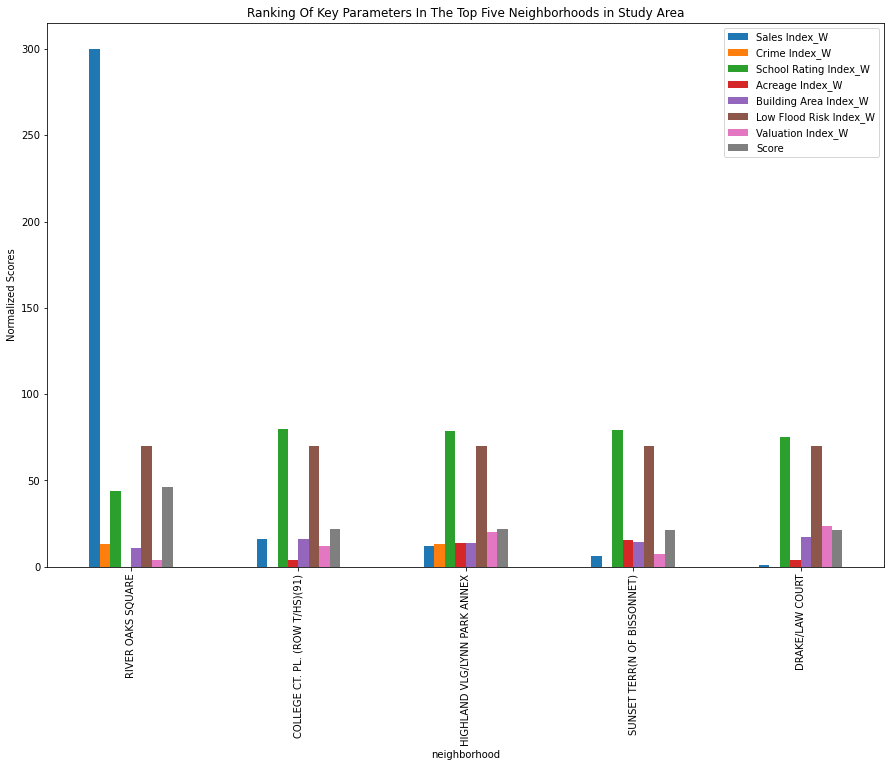

<Figure size 432x288 with 0 Axes>

In [17]:
# bar plot
ranked = rank_all.iloc[:,:-1]
ranked=ranked.head()
ranked.plot(kind='bar',figsize=(15,10))
plt.ylabel("Normalized Scores")
plt.title("Ranking Of Key Parameters In The Top Five Neighborhoods in Study Area")
plt.show()
plt.savefig('Output/Results_Bar_All.png')

In [18]:
#Build Data for Map of Selected Neighborhoods
lat_df=homes_less_than_1M.groupby('neighborhood')['Latitude'].mean()
lat_df=pd.DataFrame(lat_df)
lat_df=lat_df.reset_index()

lon_df=homes_less_than_1M.groupby('neighborhood')['Longitude'].mean()
lon_df=pd.DataFrame(lon_df)
lon_df=lon_df.reset_index()

zip_df=homes_less_than_1M.groupby('neighborhood')['Zip Code'].mean()
zip_df=pd.DataFrame(zip_df)
zip_df=zip_df.reset_index()

locations = pd.merge(lat_df,lon_df,on="neighborhood")
locations = pd.merge(locations,zip_df,on="neighborhood")
locations.head()


,neighborhood,Latitude,Longitude,Zip Code
0,2300 STEEL STREET,29.739332,-95.415268,77098.0
1,3818-3822 BUTE,29.737670,-95.384678,77006.0
2,AFTON OAKS,29.736013,-95.454283,77027.0
3,AFTON OAKS (S. OF RICHMOND),29.731563,-95.452927,77027.0
4,ALABAMA COURTS PLACE,29.736652,-95.434359,77027.0


In [19]:
#Build Map for seelected Neighborhhods
locations_all=pd.merge(locations,ranked,on="neighborhood")
locations_all['Zip Code']=locations_all['Zip Code'].map("{:.0f}".format)
locations_all['Score']=locations_all['Score'].map("{:,.2f}".format)
locate=locations_all[['Latitude', 'Longitude']]

#Build Map
fig = gmaps.figure(map_type='TERRAIN', center=(29.7, -95.4), zoom_level=12,layout={
        'width': '1000px',
        'height': '700px',
        'padding': '3px',
        'border': '1px solid black'
})

info_box_template = """
<dl>
<dt>Neighborhood</dt><dd>{neighborhood}</dd>
<dt>Score</dt><dd>{Score}</dd>
<dt>ZIP_Code</dt><dd>{Zip Code}</dd>
</dl>
"""

info = [info_box_template.format(**row) for index, row in locations_all.iterrows()]

markers = gmaps.marker_layer(locate, info_box_content= info)
fig.add_layer(markers)
plt.savefig('Output/Results_Map_All.png')
fig


Figure(layout=FigureLayout(border='1px solid black', height='700px', padding='3px', width='1000px'))

<Figure size 432x288 with 0 Axes>

In [20]:
# extract the top five neighborhoods for home values 0-250k
top_neighborhoods_250 = rank_all.loc[rank_all['Total Appraised Value']<=250000,:]
top_250k_group = top_neighborhoods_250.groupby(['neighborhood']).mean()
ranked_250k = top_250k_group.sort_values('Score',ascending=False)
ranked_250k = ranked_250k.head()
ranked_250k.head(10)

,Sales Index_W,Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Low Flood Risk Index_W,Valuation Index_W,Score,Total Appraised Value
neighborhood,,,,,,,,,
WESTWOOD (S OF BELLFORT),14.555256,16.181061,43.650794,13.557956,10.146395,70.000000,0.836229,15.165936,229662.869048
KIRBY PLACE TOWNHOUSE,15.363881,13.332466,36.363636,0.000000,6.614934,70.000000,17.835300,14.763750,245383.375000
WESTWOOD (N OF BELLFORT),4.851752,16.181061,43.636364,13.935059,10.217326,51.060606,0.891415,12.045411,225526.662338
NAOMI PLACE & OTHERS,16.172507,26.365765,21.818182,3.826769,8.793123,70.000000,9.596186,11.537695,235472.838356
FOURTH WARD DEED RESTR,4.851752,16.961498,0.000000,3.830212,8.856575,70.000000,25.021650,10.642650,192029.832117


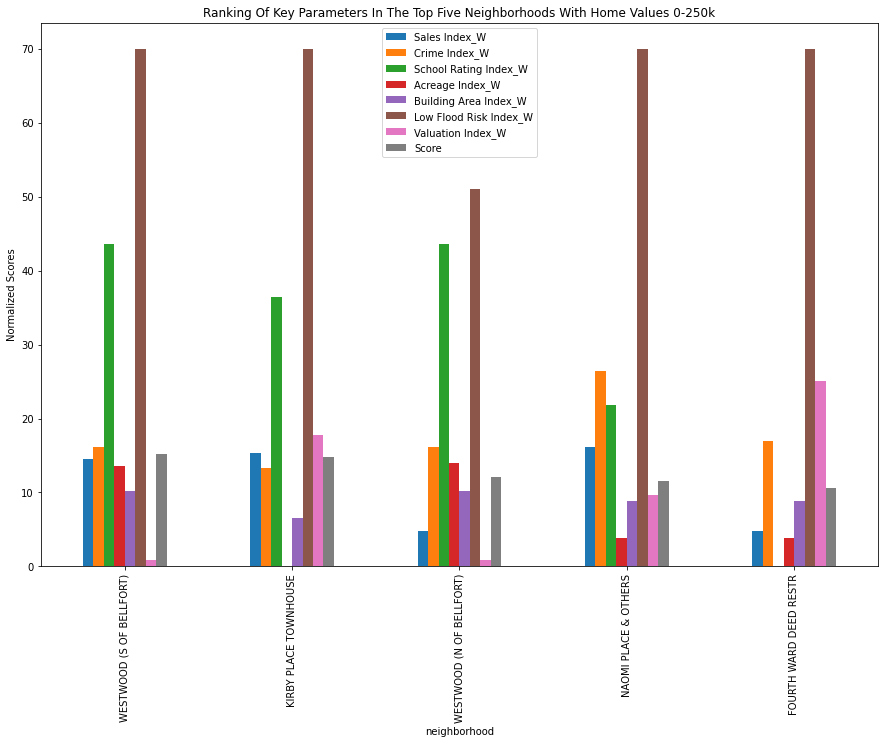

<Figure size 432x288 with 0 Axes>

In [21]:
# bar plot
ranked_250k = ranked_250k.iloc[:,:-1]
ranked_250k.plot(kind='bar',figsize=(15,10))
plt.ylabel("Normalized Scores")
plt.title("Ranking Of Key Parameters In The Top Five Neighborhoods With Home Values 0-250k")
plt.show()
plt.savefig('Output/Results_Bar_250.png')

In [22]:
#Add Map of Selected Neighborhoods
locations250=pd.merge(locations,ranked_250k,on="neighborhood")
locations250['Zip Code']=locations250['Zip Code'].map("{:.0f}".format)
locations250['Score']=locations250['Score'].map("{:,.2f}".format)
locate=locations250[['Latitude', 'Longitude']]

fig = gmaps.figure(map_type='TERRAIN', center=(29.7, -95.4), zoom_level=12,layout={
        'width': '1000px',
        'height': '700px',
        'padding': '3px',
        'border': '1px solid black'
})


info_box_template = """
<dl>
<dt>Neighborhood</dt><dd>{neighborhood}</dd>
<dt>Score</dt><dd>{Score}</dd>
<dt>ZIP_Code</dt><dd>{Zip Code}</dd>
</dl>
"""

info = [info_box_template.format(**row) for index, row in locations250.iterrows()]

markers = gmaps.marker_layer(locate, info_box_content= info)
fig.add_layer(markers)
plt.savefig('Output/Results_Map_250.png')
fig

Figure(layout=FigureLayout(border='1px solid black', height='700px', padding='3px', width='1000px'))

<Figure size 432x288 with 0 Axes>

In [23]:
# extract the top five neighborhoods for home values 250-500k
top_neighborhoods_500 = rank_all.loc[(rank_all['Total Appraised Value']>250000)&(rank_all['Total Appraised Value']<=500000),:]
top_500k_group = top_neighborhoods_500.groupby(['neighborhood']).mean()
ranked_500k = top_500k_group.sort_values('Score',ascending=False)
ranked_500k = ranked_500k.head()
ranked_500k.head(10)

,Sales Index_W,Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Low Flood Risk Index_W,Valuation Index_W,Score,Total Appraised Value
neighborhood,,,,,,,,,
RIVER OAKS SQUARE,300.000000,13.332466,43.636364,0.000000,10.654728,70.000000,4.152153,46.123864,394560.795455
MIDLANE SQUARE,1.617251,12.851197,65.454545,0.000000,12.245457,70.000000,34.030981,18.944615,302686.307692
PEMBERTON CIRCLE,3.234501,16.181061,45.963636,4.353653,17.984141,58.333333,4.384756,14.274118,472818.653333
"WEST U, ALL ROW T/H",4.043127,1.348422,61.454545,5.065610,14.266209,25.666667,11.322851,13.386000,435574.750000
LINKWOOD/BRAES MANOR,15.363881,16.181061,51.873430,17.587881,15.601884,0.580110,29.450989,12.684889,449949.491713


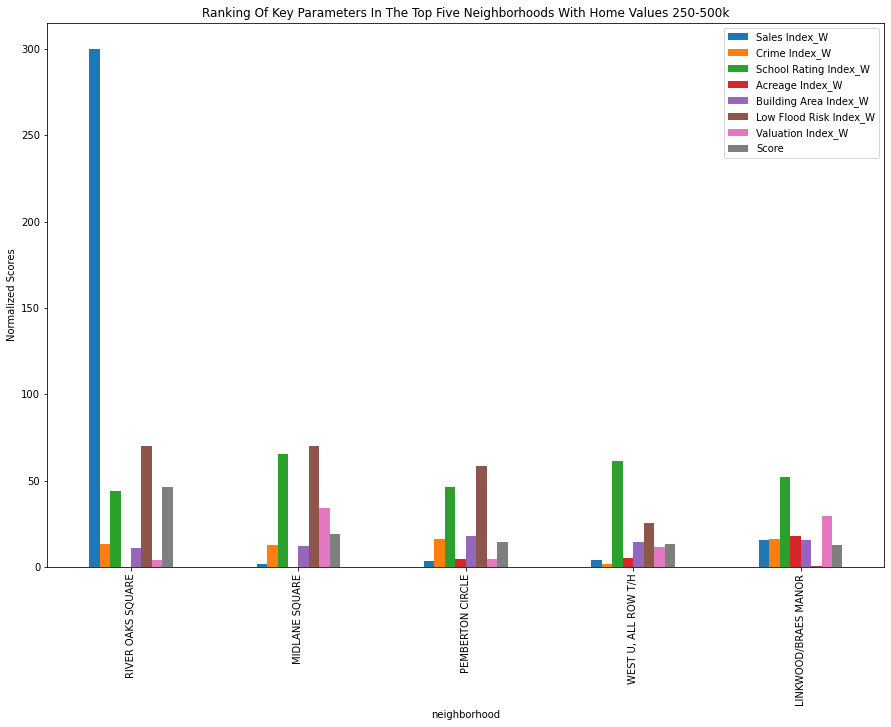

<Figure size 432x288 with 0 Axes>

In [24]:
# bar plot
ranked_500k = ranked_500k.iloc[:,:-1]
ranked_500k.plot(kind='bar',figsize=(15,10))
plt.ylabel("Normalized Scores")
plt.title("Ranking Of Key Parameters In The Top Five Neighborhoods With Home Values 250-500k")
plt.show()
plt.savefig('Output/Results_Bar_500.png')

In [25]:
#Add Map of Selected Neighborhoods
locations500=pd.merge(locations,ranked_500k,on="neighborhood")
locations500['Zip Code']=locations500['Zip Code'].map("{:.0f}".format)
locations500['Score']=locations500['Score'].map("{:,.2f}".format)
locate=locations500[['Latitude', 'Longitude']]

fig = gmaps.figure(map_type='TERRAIN', center=(29.7, -95.4), zoom_level=12,layout={
        'width': '1000px',
        'height': '700px',
        'padding': '3px',
        'border': '1px solid black'
})


info_box_template = """
<dl>
<dt>Neighborhood</dt><dd>{neighborhood}</dd>
<dt>Score</dt><dd>{Score}</dd>
<dt>ZIP_Code</dt><dd>{Zip Code}</dd>
</dl>
"""

info = [info_box_template.format(**row) for index, row in locations500.iterrows()]

markers = gmaps.marker_layer(locate, info_box_content= info)
fig.add_layer(markers)
plt.savefig('Output/Results_Map_500.png')
fig

Figure(layout=FigureLayout(border='1px solid black', height='700px', padding='3px', width='1000px'))

<Figure size 432x288 with 0 Axes>

In [26]:
# extract the top five neighborhoods for home values 500-750k
top_neighborhoods_750 = rank_all.loc[(rank_all['Total Appraised Value']>500000)&(rank_all['Total Appraised Value']<=750000),:]
top_750k_group = top_neighborhoods_750.groupby(['neighborhood']).mean()
ranked_750k = top_750k_group.sort_values('Score',ascending=False)
ranked_750k = ranked_750k.head()
ranked_750k.head(10)

,Sales Index_W,Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Low Flood Risk Index_W,Valuation Index_W,Score,Total Appraised Value
neighborhood,,,,,,,,,
COLLEGE CT. PL. (ROW T/HS)(91),16.172507,0.000000,80.000000,3.929745,15.834158,70.0,11.908003,21.965536,517892.252066
HIGHLAND VLG/LYNN PARK ANNEX,12.129380,12.851197,78.499278,13.508510,13.499888,70.0,20.047261,21.648095,743596.039683
SUNSET TERR(N OF BISSONNET),6.469003,0.000000,79.090909,15.379059,14.576988,70.0,7.547179,21.439852,725735.132353
DRAKE/LAW COURT,0.808625,0.000000,75.244755,4.024761,17.276868,70.0,23.394122,21.010000,649432.500000
COLLEGE CT PL.,2.425876,0.000000,80.000000,9.071791,16.213833,70.0,7.809527,20.613889,661520.750000


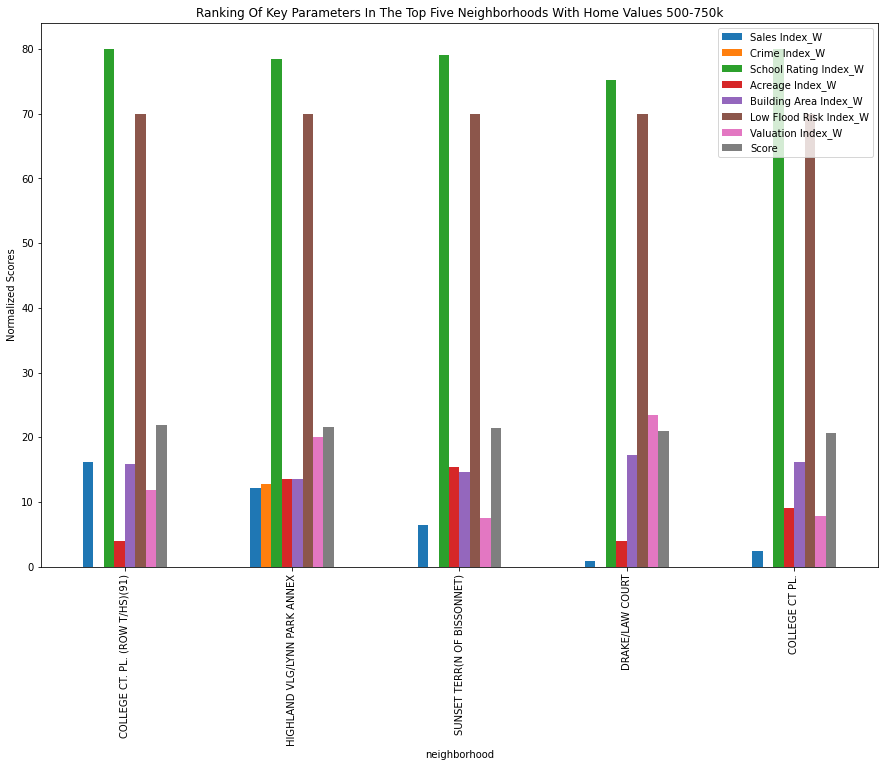

<Figure size 432x288 with 0 Axes>

In [27]:
# bar plot
ranked_750k = ranked_750k.iloc[:,:-1]
ranked_750k.plot(kind='bar',figsize=(15,10))
plt.ylabel("Normalized Scores")
plt.title("Ranking Of Key Parameters In The Top Five Neighborhoods With Home Values 500-750k")
plt.show()
plt.savefig('Output/Results_Bar_750.png')

In [28]:
#Add Map of Selected Neighborhoods
locations750=pd.merge(locations,ranked_750k,on="neighborhood")
locations750['Zip Code']=locations750['Zip Code'].map("{:.0f}".format)
locations750['Score']=locations750['Score'].map("{:,.2f}".format)
locate=locations750[['Latitude', 'Longitude']]

fig = gmaps.figure(map_type='TERRAIN', center=(29.7, -95.4), zoom_level=12,layout={
        'width': '1000px',
        'height': '700px',
        'padding': '3px',
        'border': '1px solid black'
})


info_box_template = """
<dl>
<dt>Neighborhood</dt><dd>{neighborhood}</dd>
<dt>Score</dt><dd>{Score}</dd>
<dt>ZIP_Code</dt><dd>{Zip Code}</dd>
</dl>
"""

info = [info_box_template.format(**row) for index, row in locations750.iterrows()]

markers = gmaps.marker_layer(locate, info_box_content= info)
fig.add_layer(markers)
plt.savefig('Output/Results_Map_750.png')
fig

Figure(layout=FigureLayout(border='1px solid black', height='700px', padding='3px', width='1000px'))

<Figure size 432x288 with 0 Axes>

In [29]:
# extract the top five neighborhoods for home values 750-1000k
top_neighborhoods_1000 = rank_all.loc[(rank_all['Total Appraised Value']>750000)&(rank_all['Total Appraised Value']<=1000000),:]
top_1000k_group = top_neighborhoods_1000.groupby(['neighborhood']).mean()
ranked_1000k = top_1000k_group.sort_values('Score',ascending=False)
ranked_1000k = ranked_1000k.head()
ranked_1000k.head(10)

,Sales Index_W,Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Low Flood Risk Index_W,Valuation Index_W,Score,Total Appraised Value
neighborhood,,,,,,,,,
AFTON OAKS,8.894879,12.851197,71.138976,16.817886,15.728820,70.0,6.597059,19.591724,793904.356322
ROYDEN OAKS,2.425876,12.851197,78.614719,14.802890,16.024255,70.0,5.089154,19.344286,891063.476190
WEST LANE PLACE ROW T/H,7.277628,12.851197,70.769231,6.313002,21.192499,70.0,6.777104,18.830641,769521.435897
"WEST U,SUNSET TERR/OTHERS",5.660377,0.000000,72.496392,12.402609,14.311661,50.0,14.979654,18.750492,872295.777778
JANDON GARDEN/LASSETER ESTATE,1.617251,0.000000,37.818182,14.196037,18.612136,70.0,16.326099,17.618000,928695.000000


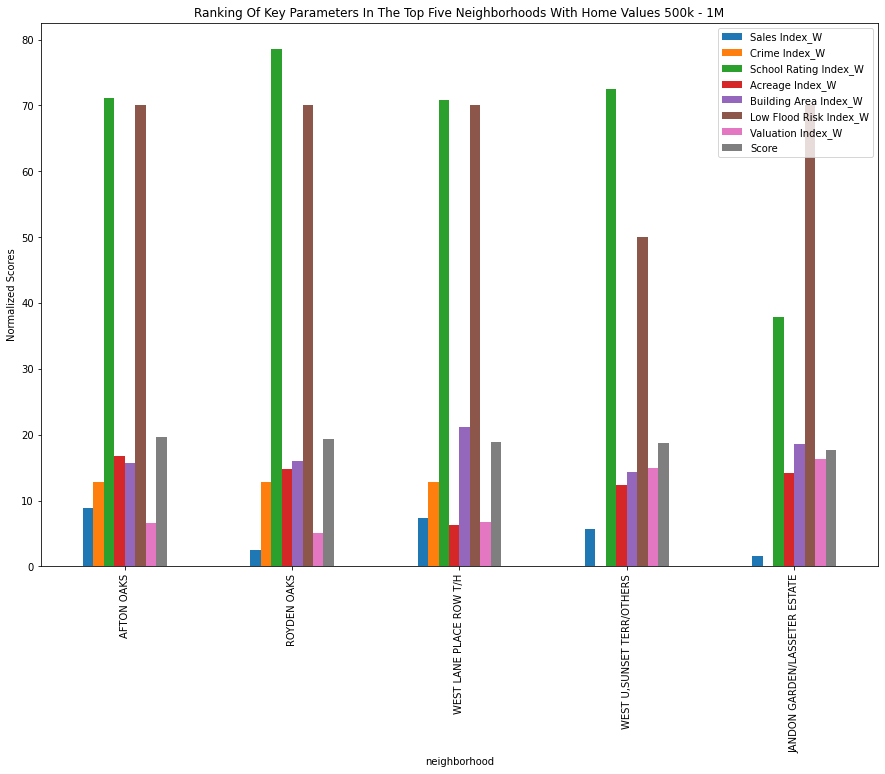

<Figure size 432x288 with 0 Axes>

In [30]:
# bar plot
ranked_1000k = ranked_1000k.iloc[:,:-1]
ranked_1000k.plot(kind='bar',figsize=(15,10))
plt.ylabel("Normalized Scores")
plt.title("Ranking Of Key Parameters In The Top Five Neighborhoods With Home Values 500k - 1M")
plt.show()
plt.savefig('Output/Results_Bar_1000.png')

In [31]:
#Add Map of Selected Neighborhoods
locations1000=pd.merge(locations,ranked_1000k,on="neighborhood")
locations1000['Zip Code']=locations1000['Zip Code'].map("{:.0f}".format)
locations1000['Score']=locations1000['Score'].map("{:,.2f}".format)
locate=locations1000[['Latitude', 'Longitude']]

fig = gmaps.figure(map_type='TERRAIN', center=(29.7, -95.4), zoom_level=12,layout={
        'width': '1000px',
        'height': '700px',
        'padding': '3px',
        'border': '1px solid black'
})


info_box_template = """
<dl>
<dt>Neighborhood</dt><dd>{neighborhood}</dd>
<dt>Score</dt><dd>{Score}</dd>
<dt>ZIP_Code</dt><dd>{Zip Code}</dd>
</dl>
"""

info = [info_box_template.format(**row) for index, row in locations1000.iterrows()]

markers = gmaps.marker_layer(locate, info_box_content= info)
fig.add_layer(markers)
plt.savefig('Output/Results_Map_1000.png')
fig

Figure(layout=FigureLayout(border='1px solid black', height='700px', padding='3px', width='1000px'))

<Figure size 432x288 with 0 Axes>